# Diabetes readmission problem

First we start by importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('training_data.csv',index_col='encounter_id')  #importing files in dataframe

In [4]:
df.head() # look at the head of data

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,N
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,N
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,N


In [5]:
df['weight'].value_counts()

?            78844
[75-100)      1075
[50-75)        718
[100-125)      509
[125-150)      120
[25-50)         70
[0-25)          39
[150-175)       29
[175-200)        8
>200             2
Name: weight, dtype: int64

Lets see if we can guess the missing weights

In [6]:
df[(df['race']=='Caucasian')&(df['gender']=='Male')&(df['age']=='[40-50)')]['weight'].value_counts()

?            2465
[75-100)       30
[100-125)      22
[125-150)      11
[50-75)        11
[175-200)       3
[0-25)          3
[25-50)         2
[150-175)       2
Name: weight, dtype: int64

We have a lot of missing data and the age range differs a lot within given race, gender and age so I 
think it is better to not use this column in classification problem

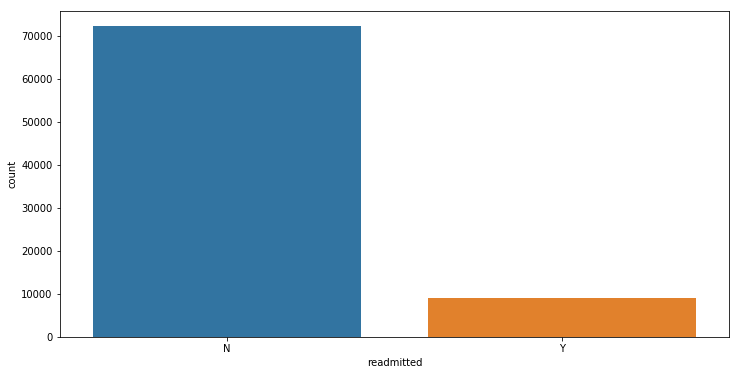

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81414 entries, 2278392 to 443867222
Data columns (total 49 columns):
patient_nbr                 81414 non-null int64
race                        81414 non-null object
gender                      81414 non-null object
age                         81414 non-null object
weight                      81414 non-null object
admission_type_id           81414 non-null int64
discharge_disposition_id    81414 non-null int64
admission_source_id         81414 non-null int64
time_in_hospital            81414 non-null int64
payer_code                  81414 non-null object
medical_specialty           81414 non-null object
num_lab_procedures          81414 non-null int64
num_procedures              81414 non-null int64
num_medications             81414 non-null int64
number_outpatient           81414 non-null int64
number_emergency            81414 non-null int64
number_inpatient            81414 non-null int64
diag_1                      81414 non-null

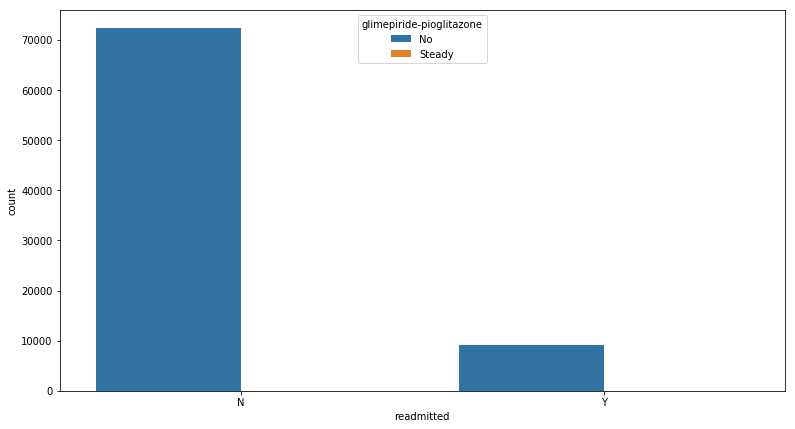

In [12]:
plt.figure(figsize=(13,7))
sns.countplot(df['readmitted'],hue=df['glimepiride-pioglitazone'])

In [9]:
df[df['readmitted']=='Y']['race'].value_counts()/df[df['readmitted']=='Y']['race'].value_counts().sum()

Caucasian          0.754347
AfricanAmerican    0.191283
Hispanic           0.019150
?                  0.017169
Other              0.012217
Asian              0.005833
Name: race, dtype: float64

In [10]:
df[df['readmitted']=='N']['race'].value_counts()/df[df['readmitted']=='N']['race'].value_counts().sum()

Caucasian          0.746433
AfricanAmerican    0.189069
?                  0.022910
Hispanic           0.019951
Other              0.015278
Asian              0.006360
Name: race, dtype: float64

So, looks like race is really not a factor in readmission

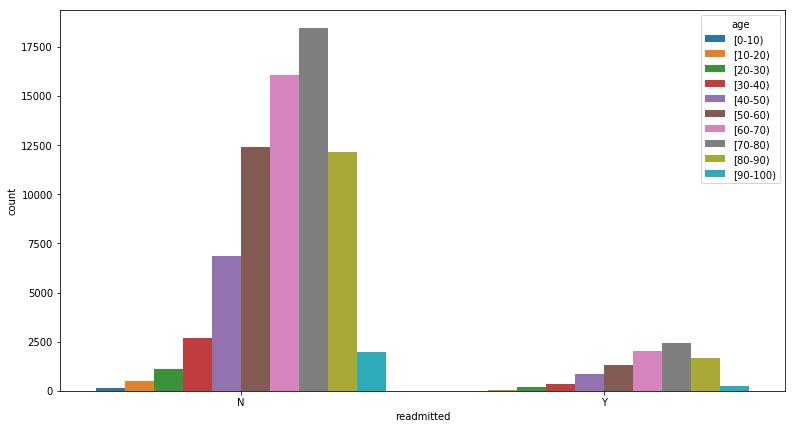

In [11]:
plt.figure(figsize=(13,7))
sns.countplot(x='readmitted',hue='age',data=df)

In [12]:
df[df['readmitted']=='Y']['age'].value_counts()/df[df['readmitted']=='Y']['age'].value_counts().sum()

[70-80)     0.270086
[60-70)     0.221660
[80-90)     0.181928
[50-60)     0.146929
[40-50)     0.091680
[30-40)     0.036540
[90-100)    0.027185
[20-30)     0.020361
[10-20)     0.003412
[0-10)      0.000220
Name: age, dtype: float64

In [13]:
df[df['readmitted']=='N']['age'].value_counts()/df[df['readmitted']=='N']['age'].value_counts().sum()

[70-80)     0.254894
[60-70)     0.221837
[50-60)     0.171455
[80-90)     0.167943
[40-50)     0.095053
[30-40)     0.037150
[90-100)    0.027223
[20-30)     0.015582
[10-20)     0.007134
[0-10)      0.001728
Name: age, dtype: float64

Among readmitted age group 50-60 makes 54 percent while among not-readmitted age group 50-60 makes 67 percent.
so this might have some information so we will keep this column. 

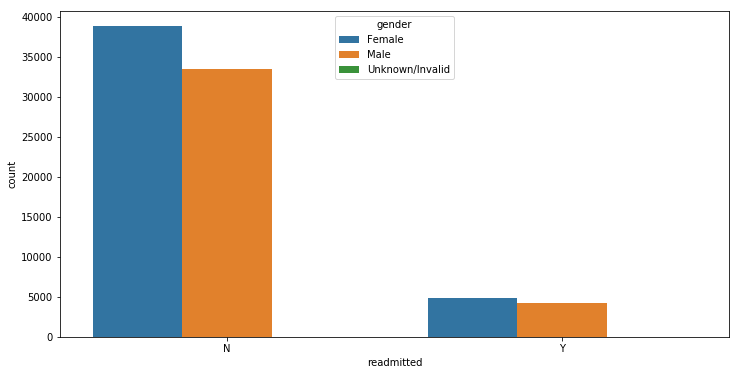

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'],hue=df['gender'])

In [15]:
df[df['readmitted']=='Y']['gender'].value_counts()/df[df['readmitted']=='Y']['gender'].value_counts().sum()

Female    0.53764
Male      0.46236
Name: gender, dtype: float64

In [16]:
df[df['readmitted']=='N']['gender'].value_counts()/df[df['readmitted']=='N']['gender'].value_counts().sum()

Female             0.537371
Male               0.462601
Unknown/Invalid    0.000028
Name: gender, dtype: float64

gender doesnt seem to play any role

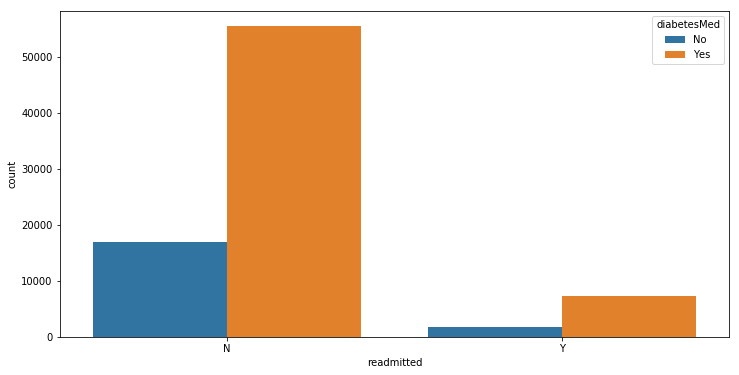

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'],hue=df['diabetesMed'])

In [18]:
df[df['readmitted']=='Y']['diabetesMed'].value_counts()/df[df['readmitted']=='Y']['diabetesMed'].value_counts().sum()

Yes    0.802884
No     0.197116
Name: diabetesMed, dtype: float64

In [19]:
df[df['readmitted']=='N']['diabetesMed'].value_counts()/df[df['readmitted']=='N']['diabetesMed'].value_counts().sum()

Yes    0.76648
No     0.23352
Name: diabetesMed, dtype: float64

don't drop diabetesMed

In [20]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,N
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,N
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,N


# cleaning up the data

First, I will separate object columns

In [21]:
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_2'] = pd.to_numeric(df['diag_1'], errors='coerce')
df['diag_3'] = pd.to_numeric(df['diag_1'], errors='coerce')

In [22]:
df['diag_1'].isnull().value_counts()

False    80071
True      1343
Name: diag_1, dtype: int64

In [23]:
df['diag_2'].isnull().value_counts()

False    80071
True      1343
Name: diag_2, dtype: int64

In [24]:
# fill in the diag_1, diag_2,diag_3 columns
for age in df['age'].unique():
    for gender in df['gender'].unique():
        average1 = df[(df['gender']==gender)&(df['age']==age)]['diag_1'].mean()
        average2 = df[(df['gender']==gender)&(df['age']==age)]['diag_2'].mean()
        average3 = df[(df['gender']==gender)&(df['age']==age)]['diag_3'].mean()
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_1'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_1'].fillna(average1)
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_2'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_2'].fillna(average2)
        df.loc[(df['gender']==gender)&(df['age']==age),'diag_3'] = df.loc[(df['gender']==gender)&(df['age']==age),'diag_3'].fillna(average3)

In [25]:
df['diag_1'].isnull().value_counts()

False    81414
Name: diag_1, dtype: int64

In [26]:
#for age in df['age'].unique():
#    df.loc[df['age']==age,'age'] = pd.to_numeric(str(age).strip('[)').split('-')).mean()
#df['age'] = df['age'].astype(float)

In [27]:
df.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,N
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,N
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,N
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,N


So diag columns has been filled

In [28]:
droplist_1=['weight','patient_nbr','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty','change']

In [29]:
df_obj = df.select_dtypes(include=['object'])

In [30]:
df_obj['miglitol'].value_counts()

No        81382
Steady       27
Down          4
Up            1
Name: miglitol, dtype: int64

From, above value count we see that most patients were not given 'miglitol'. The number of patients that were given 
are statistically insignificant

In [31]:
# list of columns that can be dropped because this particular medication is not
# given to enough patient to make any difference in this analysis
drop_list=[]
for col in df_obj.columns:
    if df_obj[str(col)].value_counts()[0]>(len(df_obj.index)-1000):
        drop_list.append(str(col))
print(drop_list)

['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


In [32]:
for j in droplist_1:
    drop_list.append(j)

In [33]:
drop_list

['nateglinide',
 'chlorpropamide',
 'acetohexamide',
 'tolbutamide',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'weight',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'payer_code',
 'medical_specialty',
 'change']

Drop columns with too much missing data and that are not relevant

In [34]:
df1 = df.drop(drop_list,axis=1)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81414 entries, 2278392 to 443867222
Data columns (total 26 columns):
race                  81414 non-null object
gender                81414 non-null object
age                   81414 non-null object
time_in_hospital      81414 non-null int64
num_lab_procedures    81414 non-null int64
num_procedures        81414 non-null int64
num_medications       81414 non-null int64
number_outpatient     81414 non-null int64
number_emergency      81414 non-null int64
number_inpatient      81414 non-null int64
diag_1                81414 non-null float64
diag_2                81414 non-null float64
diag_3                81414 non-null float64
number_diagnoses      81414 non-null int64
max_glu_serum         81414 non-null object
A1Cresult             81414 non-null object
metformin             81414 non-null object
repaglinide           81414 non-null object
glimepiride           81414 non-null object
glipizide             81414 non-null object
glybur

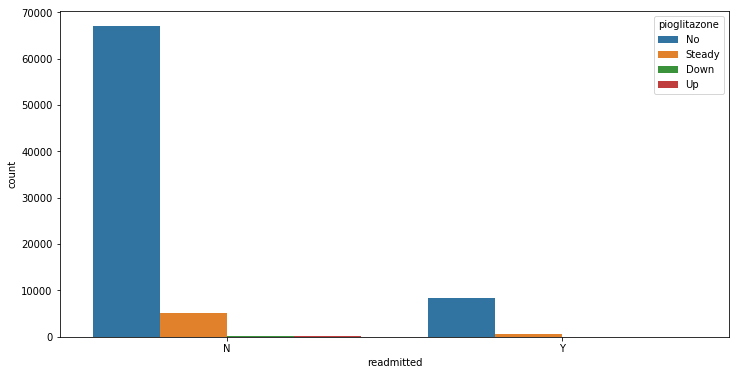

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df['readmitted'],hue=df['pioglitazone'])

In [40]:
yes = df[df['readmitted']=='Y']['pioglitazone'].value_counts()/df[df['readmitted']=='Y']['pioglitazone'].value_counts().sum()
no = df[df['readmitted']=='N']['pioglitazone'].value_counts()/df[df['readmitted']=='N']['pioglitazone'].value_counts().sum()

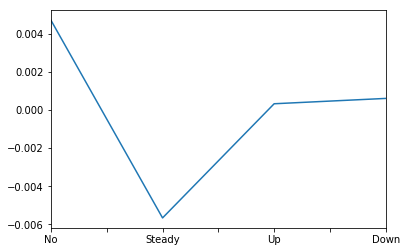

In [43]:
(yes-no).plot()

In [31]:
df[df['readmitted']=='N']['pioglitazone'].value_counts()/df[df['readmitted']=='N']['pioglitazone'].value_counts().sum()

No        0.926930
Steady    0.069613
Up        0.002309
Down      0.001148
Name: pioglitazone, dtype: float64

In [36]:
df1_num = df1.select_dtypes(include=['int64','float64'])

In [37]:
df1_num.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses'],
      dtype='object')

In [38]:
for j in df1_num.columns:
    print(df[str(j)].value_counts())
    print('\n')

3     14225
2     13810
1     11297
4     11158
5      7987
6      6018
7      4654
8      3523
9      2428
10     1877
11     1459
12     1166
13      974
14      838
Name: time_in_hospital, dtype: int64


1      2560
43     2212
44     1968
45     1904
40     1770
38     1760
46     1742
41     1712
47     1697
39     1693
42     1656
48     1646
37     1643
49     1635
36     1557
50     1547
54     1523
51     1512
35     1507
52     1503
56     1482
55     1461
53     1459
57     1387
58     1377
34     1336
59     1325
61     1310
60     1298
62     1182
       ... 
86      101
87       77
88       73
89       62
90       52
91       45
93       45
92       39
95       39
94       36
98       25
97       25
96       21
101      12
100      12
99        7
102       7
108       4
103       4
105       4
111       3
106       3
113       2
114       2
121       1
129       1
118       1
109       1
120       1
132       1
Name: num_lab_procedures, Length: 115, dtype: int64


0    37

In [39]:
df1_num.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
encounter_id,,,,,,,,,,,
2278392,1,41,0,1,0,0,0,250.83,250.83,250.83,1
149190,3,59,0,18,0,0,0,276.00,276.00,276.00,9
64410,2,11,5,13,2,0,1,648.00,648.00,648.00,6
500364,2,44,1,16,0,0,0,8.00,8.00,8.00,7
16680,1,51,0,8,0,0,0,197.00,197.00,197.00,5


In [40]:
df1_num_norm = (df1_num - df1_num.mean()) / (df1_num.max() - df1_num.min()) #Normalization

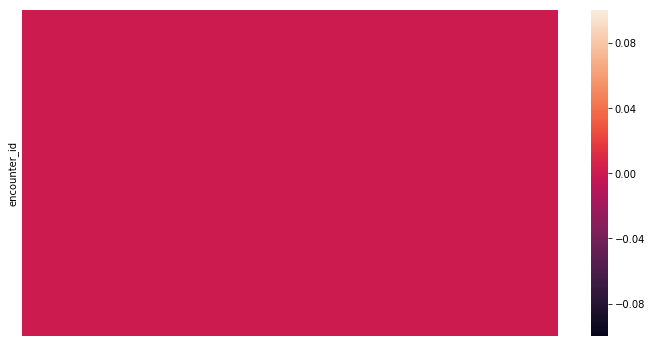

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df1_num.isnull(),yticklabels=False,xticklabels=False)  #checking for null values

In [42]:
df1_num_norm.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses
encounter_id,,,,,,,,,,,
2278392,-0.261410,-0.016477,-0.223117,-0.187864,-0.008707,-0.002624,-0.030276,-0.243822,-0.243822,-0.243822,-0.428120
149190,-0.107564,0.120927,-0.223117,0.024636,-0.008707,-0.002624,-0.030276,-0.218551,-0.218551,-0.218551,0.105213
64410,-0.184487,-0.245485,0.610217,-0.037864,0.038912,-0.002624,0.017343,0.154943,0.154943,0.154943,-0.094787
500364,-0.184487,0.006423,-0.056450,-0.000364,-0.008707,-0.002624,-0.030276,-0.487628,-0.487628,-0.487628,-0.028120
16680,-0.261410,0.059859,-0.223117,-0.100364,-0.008707,-0.002624,-0.030276,-0.297869,-0.297869,-0.297869,-0.161454


In [43]:
df1_obj = df1.select_dtypes(include=['object'])

In [44]:
df1_obj.head()

,race,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,
2278392,Caucasian,Female,[0-10),None,None,No,No,No,No,No,No,No,No,No,N
149190,Caucasian,Female,[10-20),None,None,No,No,No,No,No,No,No,Up,Yes,N
64410,AfricanAmerican,Female,[20-30),None,None,No,No,No,Steady,No,No,No,No,Yes,N
500364,Caucasian,Male,[30-40),None,None,No,No,No,No,No,No,No,Up,Yes,N
16680,Caucasian,Male,[40-50),None,None,No,No,No,Steady,No,No,No,Steady,Yes,N


In [45]:
for j in df1_obj.columns:
    print(df[str(j)].value_counts())
    print('\n')

Caucasian          60842
AfricanAmerican    15413
?                   1813
Hispanic            1617
Other               1216
Asian                513
Name: race, dtype: int64


Female             43752
Male               37660
Unknown/Invalid        2
Name: gender, dtype: int64


[70-80)     20890
[60-70)     18059
[80-90)     13800
[50-60)     13736
[40-50)      7708
[30-40)      3019
[90-100)     2216
[20-30)      1312
[10-20)       547
[0-10)        127
Name: age, dtype: int64


None    77166
Norm     2041
>200     1196
>300     1011
Name: max_glu_serum, dtype: int64


None    67762
>8       6594
Norm     4011
>7       3047
Name: A1Cresult, dtype: int64


No        65501
Steady    14615
Up          841
Down        457
Name: metformin, dtype: int64


No        80187
Steady     1096
Up           96
Down         35
Name: repaglinide, dtype: int64


No        77279
Steady     3700
Up          275
Down        160
Name: glimepiride, dtype: int64


No        71156
Steady     9211
Up       

In [46]:
df1_obj_dummies=pd.get_dummies(df1_obj,drop_first=True)

In [47]:
df1_obj_dummies.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),...,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,insulin_No,insulin_Steady,insulin_Up,diabetesMed_Yes,readmitted_Y
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
149190,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
64410,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
500364,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
16680,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


I already imported the numerical columns. Next, I am gonna concat the new colums

In [48]:
#new_df1=pd.concat([df1_num_norm,df1_obj_dummies],axis=1)
new_df1=df1_obj_dummies

In [49]:
new_df1.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,age_[10-20),age_[20-30),age_[30-40),...,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,insulin_No,insulin_Steady,insulin_Up,diabetesMed_Yes,readmitted_Y
encounter_id,,,,,,,,,,,,,,,,,,,,,
2278392,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
149190,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
64410,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
500364,0,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
16680,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [50]:
len(new_df1.index)

81414

# Classification with logistic regression (since this is binary classficiation problem)

In [51]:
X1=df2[df2['readmitted_Y']==0].drop('readmitted_Y', axis=1) #because this is our target class
y1=df2[df2['readmitted_Y']==0]['readmitted_Y']
X2=df2[df2['readmitted_Y']==1].drop('readmitted_Y', axis=1) #because this is our target class
y2=df2[df2['readmitted_Y']==1]['readmitted_Y']

In [53]:
from sklearn.cross_validation import train_test_split

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)

In [ ]:
X_train = pd.concat([X1_train,X2_train])
y_train = pd.concat([y1_train,y2_train])
X_test = pd.concat([X1_test,X2_test])
y_test = pd.concat([y1_test,y2_test])

In [55]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression(C=0.1)
logmodel.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
predictions = logmodel.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[7213    0]
 [ 929    0]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      7213
          1       0.00      0.00      0.00       929

avg / total       0.78      0.89      0.83      8142



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Next use kNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=12)

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')

In [61]:
pred_knn = knn.predict(X_test)

In [62]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

[[21722     9]
 [ 2687     7]]
             precision    recall  f1-score   support

          0       0.89      1.00      0.94     21731
          1       0.44      0.00      0.01      2694

avg / total       0.84      0.89      0.84     24425



# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[21664    29]
 [ 2723     9]]


# test set

In [189]:
test = pd.read_csv('test_data.csv')

In [190]:
test.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,No,Steady,No,No,No,No,No,Ch,Yes
1,62256,49726791,AfricanAmerican,Female,[60-70),?,3,1,2,1,...,No,No,Steady,No,No,No,No,No,No,Yes
2,150006,22864131,?,Female,[50-60),?,2,1,4,2,...,No,No,Down,No,No,No,No,No,Ch,Yes
3,183930,107400762,Caucasian,Female,[80-90),?,2,6,1,11,...,No,No,No,No,No,No,No,No,No,No
4,248916,115196778,Caucasian,Female,[50-60),?,1,1,1,2,...,No,No,Steady,No,No,No,No,No,No,Yes
